In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1

Second‐order one‐sided difference shceme을 사용하여 경계에서의 f’’를 유도하시오

In [2]:
print(-2*np.cos(16))

1.9153189606467693


In [3]:
f2_0 = (2*np.sin(16) - 5*np.sin(16-0.25**2) + 4*np.sin(16-0.5**2) - np.sin(16-0.75**2)) / (0.25**2)
print(f2_0)

2.0248034695313226


In [4]:
print(-2*(2*(8**2)*np.sin(16-8**2)+np.cos(16-8**2)))

-195.3929046199203


In [5]:
f2_8 = (2*np.sin(16-64) - 5*np.sin(16-(8-0.25)**2) + 4*np.sin(16-(8-0.5)**2) - np.sin(16-(8-0.75)**2)) / (0.25**2)
print(f2_8)

-19.16647580126187


# 2

Second‐order central difference scheme을 사용하여 exact solution 과 함께 f’’를 그리시오. (정확도는
O(Δ𝒙^𝟐)를 유지하도록 한다.)

In [6]:
def f(x):
    return np.sin(16-x**2)

In [7]:
def f2(x):
    return -2*(2*(x**2)*np.sin(16-x**2)+np.cos(16-x**2))

In [8]:
h = 0.25
x = np.linspace(0, 8, 33)
x_real = np.linspace(0, 8, 1000)
f2_exact = f2(x_real)
f2_central = (f(x[2:])+f(x[:-2])-2*f(x[1:-1])) / (h**2)
f2_central_33 = np.insert(f2_central, 0, f2_0)
f2_central_33 = np.append(f2_central_33, f2_8)

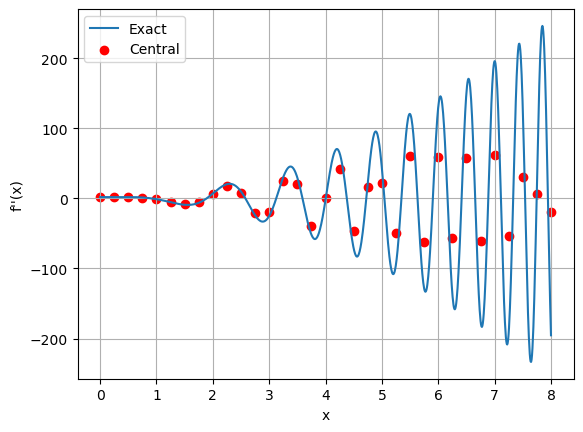

In [9]:
plt.plot(x_real, f2_exact, label='Exact')
plt.scatter(x, f2_central_33, label='Central', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('f\'\'(x)')
plt.grid()

# 2

Second‐order central difference scheme을 사용하여 격자 개수를 바꿔가며 (33,65,129) 정확도를 분
석하시오. 정확도 분석은 x축을 𝒍𝒐𝒈(Δ𝒙) , y축을 𝒍𝒐𝒈||𝒆|| 를 그리도록 한다. 본 방법에서 ||𝒆|| 는
𝐋𝟐 𝒏𝒐𝒓𝒎 𝒆𝒓𝒓𝒐𝒓 를 의미한다.

In [10]:
x_65 = np.linspace(0, 8, 65)
h_65 = x_65[1] - x_65[0]
f2_central_65 = (f(x_65[2:])+f(x_65[:-2])-2*f(x_65[1:-1])) / (h_65**2)
f2_0 = (2*np.sin(16) - 5*np.sin(16-h_65**2) + 4*np.sin(16-2*h_65**2) - np.sin(16-3*h_65**2)) / (h_65**2)
f2_8 = (2*np.sin(16-64) - 5*np.sin(16-(8-h_65)**2) + 4*np.sin(16-(8-2*h_65)**2) - np.sin(16-(8-3*h_65)**2)) / (h_65**2)
f2_central_65 = np.insert(f2_central_65, 0, f2_0)
f2_central_65 = np.append(f2_central_65, f2_8)


x_129 = np.linspace(0, 8, 129)
h_129 = x_129[1] - x_129[0]
f2_central_129 = (f(x_129[2:])+f(x_129[:-2])-2*f(x_129[1:-1])) / (h_129**2)
f2_0 = (2*np.sin(16) - 5*np.sin(16-h_129**2) + 4*np.sin(16-2*h_129**2) - np.sin(16-3*h_129**2)) / (h_129**2)
f2_8 = (2*np.sin(16-64) - 5*np.sin(16-(8-h_129)**2) + 4*np.sin(16-(8-2*h_129)**2) - np.sin(16-(8-3*h_129)**2)) / (h_129**2)
f2_central_129 = np.insert(f2_central_129, 0, f2_0)
f2_central_129 = np.append(f2_central_129, f2_8)

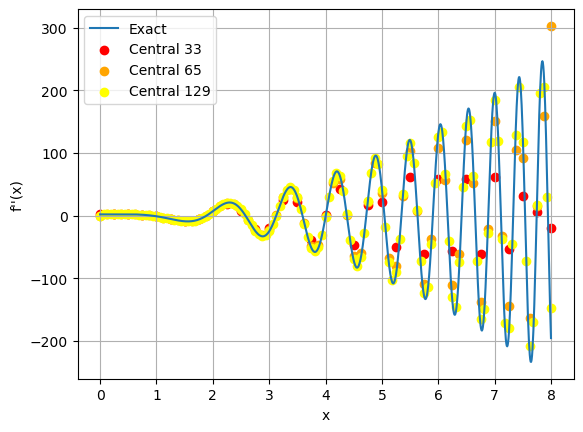

In [11]:
plt.plot(x_real, f2_exact, label='Exact')
plt.scatter(x, f2_central_33, label='Central 33', color='red')
plt.scatter(x_65, f2_central_65, label='Central 65', color='orange')
plt.scatter(x_129, f2_central_129, label='Central 129', color='yellow')
plt.legend()
plt.xlabel('x')
plt.ylabel('f\'\'(x)')
plt.grid()

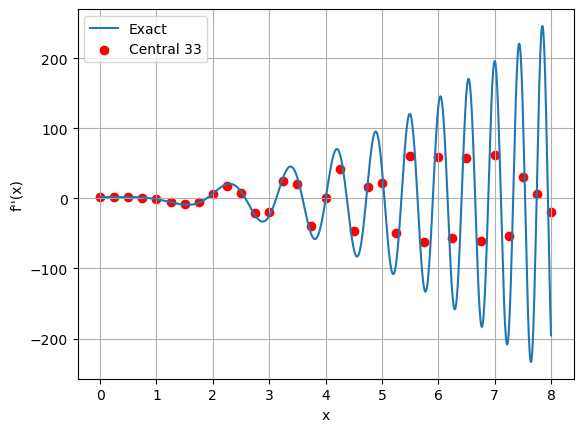

In [12]:
plt.plot(x_real, f2_exact, label='Exact')
plt.scatter(x, f2_central_33, label='Central 33', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('f\'\'(x)')
plt.grid()

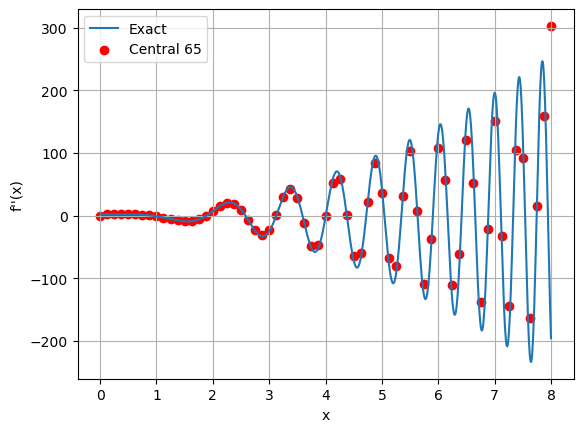

In [13]:
plt.plot(x_real, f2_exact, label='Exact')
plt.scatter(x_65, f2_central_65, label='Central 65', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('f\'\'(x)')
plt.grid()

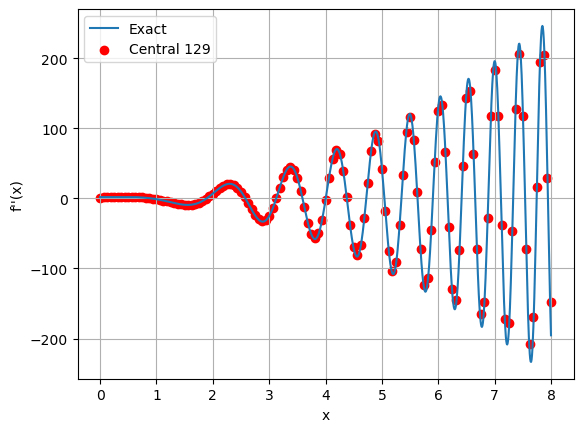

In [14]:
plt.plot(x_real, f2_exact, label='Exact')
plt.scatter(x_129, f2_central_129, label='Central 129', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('f\'\'(x)')
plt.grid()

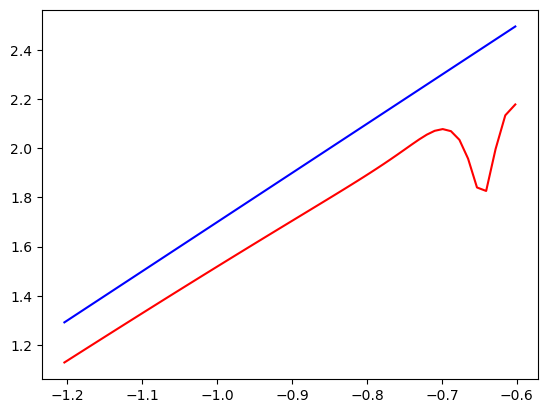

In [28]:
error_list = []
h_list = []
for a in range(33, 130):
    x_mid = np.linspace(0, 8, a)
    h_mid = x_mid[1] - x_mid[0]
    f2_central_mid = (f(x_mid[2:])+f(x_mid[:-2])-2*f(x_mid[1:-1])) / (h_mid**2)
    error_mid = (np.sum((f2_central_mid - f2(x_mid)[1:-1])**2)*h_mid)**0.5
    error_list.append(error_mid)
    h_list.append(x_mid[1] - x_mid[0])

plt.plot(np.log10(h_list), np.log10(error_list), label='all', color='red')
plt.plot(np.log10(h_list), 2*np.log10(h_list)+3.7, label='slope 2', color='blue')


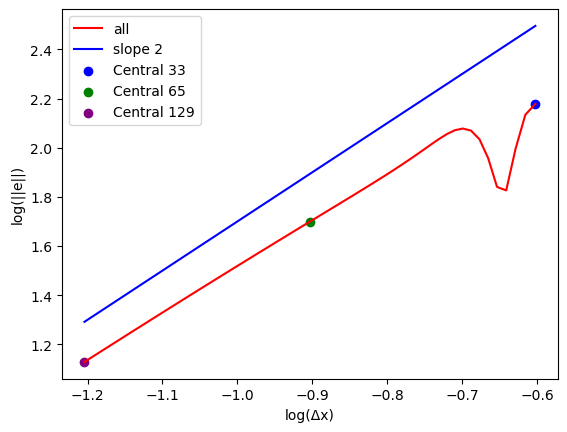

In [34]:
error_33 = (np.sum((f2_central_33[1:-1] - f2(x)[1:-1])**2)*h)**0.5
error_65 = (np.sum((f2_central_65[1:-1] - f2(x_65)[1:-1])**2)*h_65)**0.5
error_129 = (np.sum((f2_central_129[1:-1] - f2(x_129)[1:-1])**2)*h_129)**0.5

error_list = []
h_list = []
for a in range(33, 130):
    x_mid = np.linspace(0, 8, a)
    h_mid = x_mid[1] - x_mid[0]
    f2_central_mid = (f(x_mid[2:])+f(x_mid[:-2])-2*f(x_mid[1:-1])) / (h_mid**2)
    error_mid = (np.sum((f2_central_mid - f2(x_mid)[1:-1])**2)*h_mid)**0.5
    error_list.append(error_mid)
    h_list.append(x_mid[1] - x_mid[0])

plt.plot(np.log10(h_list), np.log10(error_list), label='all', color='red')
plt.plot(np.log10(h_list), 2*np.log10(h_list)+3.7, label='slope 2', color='blue')

plt.scatter(np.log10(h), np.log10(error_33), label='Central 33', color='blue')
plt.scatter(np.log10(h_65), np.log10(error_65), label='Central 65', color='green')
plt.scatter(np.log10(h_129), np.log10(error_129), label='Central 129', color='purple')
plt.xlabel('log(Δx)')
plt.ylabel('log(||e||)')
plt.legend()